In [4]:
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv('C:\\Users\\Abhishek\\Desktop\\phd\\archive (4)\\heart.csv')

In [6]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Check the structure of the dataset
print("\nDataset structure:")
print(dataset.info())


Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [8]:
print("\nMissing values:")

print(dataset.isnull().sum())


Missing values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [9]:
print("\nSummary statistics of numerical features:")
print(dataset.describe())


Summary statistics of numerical features:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


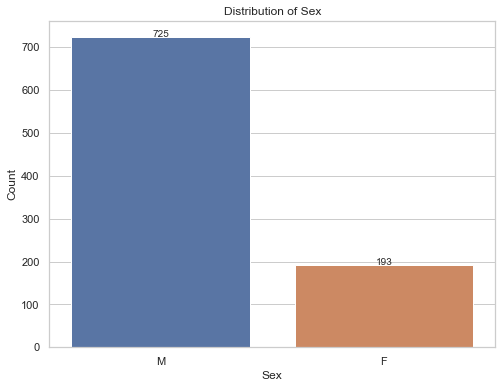

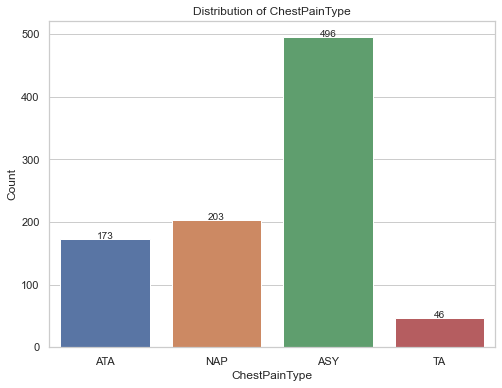

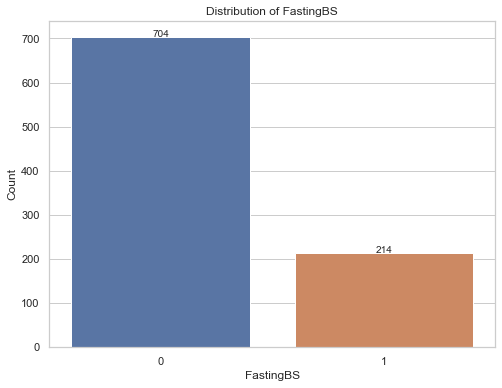

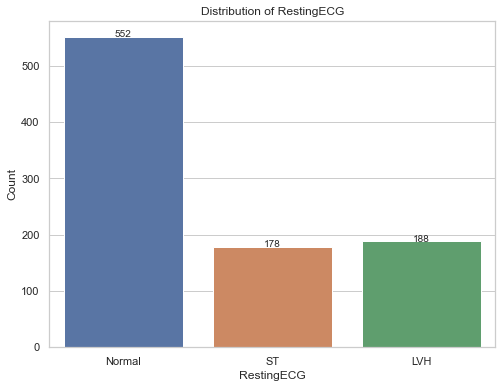

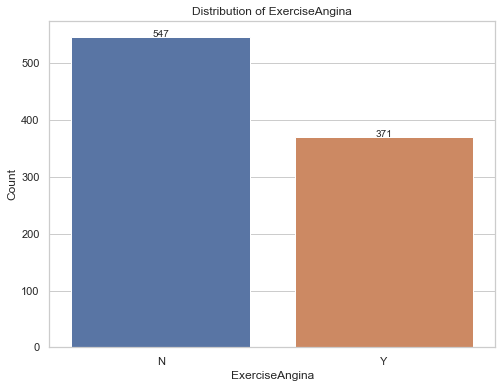

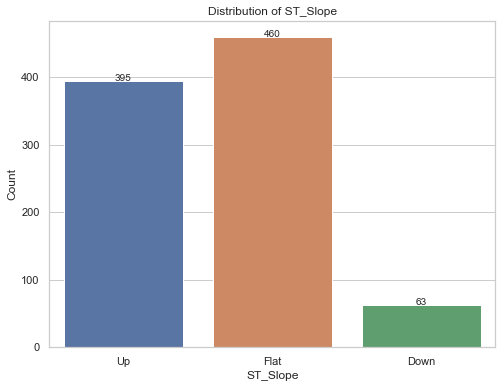

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Define a function to plot bar plots for categorical features with count annotations
def plot_categorical_distribution_with_count(feature_name):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature_name, data=dataset)

    # Add count annotations
    total = len(dataset[feature_name])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha="center", fontsize=10)

    plt.title(f"Distribution of {feature_name}")
    plt.xlabel(feature_name)
    plt.ylabel("Count")
    plt.show()

# Plot distribution of categorical features with count annotations
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_features:
    plot_categorical_distribution_with_count(feature)

In [11]:
# Print distribution of the target variable (HeartDisease) with counts
print("\nDistribution of the target variable (HeartDisease):")
heart_disease_counts = dataset['HeartDisease'].value_counts()
for label, count in heart_disease_counts.items():
    print(f"{label}: {count}")


Distribution of the target variable (HeartDisease):
1: 508
0: 410


In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler

# Separate features and target variable
X = dataset.drop(columns=['HeartDisease'])
y = dataset['HeartDisease']

# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocess numerical features
imputer = SimpleImputer(strategy='mean')
X[numerical_features] = imputer.fit_transform(X[numerical_features])

scaler = MinMaxScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Preprocess categorical features
encoder = LabelEncoder()
X[categorical_features] = X[categorical_features].apply(encoder.fit_transform)

# Handle class imbalance
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the class distribution after handling imbalance
print("Class distribution after handling imbalance:")
print(y_resampled.value_counts())


Class distribution after handling imbalance:
0    508
1    508
Name: HeartDisease, dtype: int64


In [14]:
X_resampled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2


In [15]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit, GridSearchCV
import pandas as pd

pd.set_option('display.max_colwidth', None)

def find_best_model_using_gridsearchcv(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    algos = {
        'Decision Tree': {
            'model': DecisionTreeClassifier(),
            'params': {'criterion': ['gini', 'entropy'],
                       'splitter': ['best', 'random'],
                       'max_depth': [None, 5, 10, 15],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]},
            'loss': ['gini', 'entropy']
        },
        'Random Forest': {
            'model': RandomForestClassifier(),
            'params': {'n_estimators': [100, 150],
                       'criterion': ['gini', 'entropy'],
                       'max_depth': [None, 5, 10, 15],
                       'min_samples_split': [2, 5, 10],
                       'min_samples_leaf': [1, 2, 4]},
            'loss': ['gini', 'entropy']
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(),
            'params': {'n_estimators': [100, 150],
                       'learning_rate': [0.05, 0.1, 0.2],
                       'max_depth': [3, 5, 7]},
            'loss': ['deviance', 'exponential']
        },
        'SVM': {
            'model': SVC(),
            'params': {'C': [0.1, 1, 10, 100],
                       'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                       'class_weight': ['balanced', None]}
        },
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {'n_neighbors': [3, 5, 7, 9],
                       'weights': ['uniform', 'distance'],
                       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X_train, y_train)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'loss_function': gs.best_params_.get('loss', None)  # Added loss function
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'loss_function'])

find_best_model_using_gridsearchcv(X_resampled, y_resampled)


,model,best_score,best_params,loss_function
0,Decision Tree,0.867485,"{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}",None
1,Random Forest,0.882209,"{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}",None
2,Gradient Boosting,0.874847,"{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}",None
3,SVM,0.867485,"{'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}",None
4,KNN,0.878528,"{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}",None


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier with the best parameters
rf_classifier = RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=2)

# Train the model on the entire dataset
rf_classifier.fit(X_resampled, y_resampled)

# Predict the target values
y_pred = rf_classifier.predict(X_resampled)

# Calculate accuracy
accuracy = accuracy_score(y_resampled, y_pred)
print("Accuracy on training set:", accuracy)


Accuracy on training set: 0.969488188976378


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict the target values on the test set
y_test_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Print evaluation metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Analyze the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Evaluation Metrics:
Accuracy: 0.9755
Precision: 0.9587
Recall: 1.0000
F1-Score: 0.9789
AUC-ROC: 0.9716

Confusion Matrix:
[[ 83   5]
 [  0 116]]


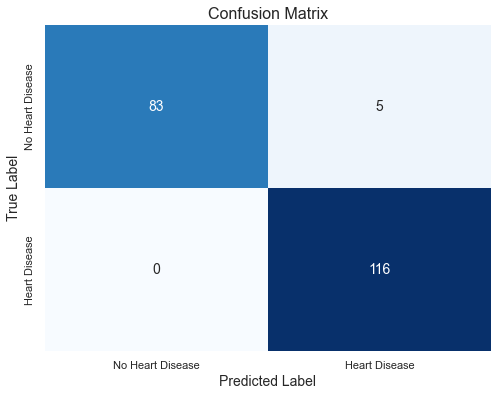

In [24]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={'size': 14}, 
            xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

In [25]:

from tabulate import tabulate

# Create a DataFrame for evaluation metrics
eval_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC'],
    'Score': [accuracy, precision, recall, f1, roc_auc]
})

# Print evaluation metrics table
print("\nEvaluation Metrics:")
print(tabulate(eval_metrics_df, headers='keys', tablefmt='pretty', showindex=False))



Evaluation Metrics:
+-----------+--------------------+
|  Metric   |       Score        |
+-----------+--------------------+
| Accuracy  | 0.9754901960784313 |
| Precision | 0.9586776859504132 |
|  Recall   |        1.0         |
| F1-Score  | 0.9789029535864979 |
|  AUC-ROC  | 0.9715909090909092 |
+-----------+--------------------+


In [ ]:
import pandas as pd
import numpy as np

def preprocess_input(input_features):
    # Define mapping for categorical features
    sex_mapping = {'Male': 1, 'Female': 0}
    chest_pain_mapping = {'Typical Angina': 0, 'Atypical Angina': 1, 'Non-Anginal Pain': 2, 'Asymptomatic': 3}
    fasting_bs_mapping = {'True': 1, 'False': 0}
    resting_ecg_mapping = {'Normal': 0, 'ST-T Wave Abnormality': 1, 'Left Ventricular Hypertrophy': 2}
    exercise_angina_mapping = {'Yes': 1, 'No': 0}
    st_slope_mapping = {'Upsloping': 0, 'Flat': 1, 'Downsloping': 2}

    # Convert categorical features to numerical
    input_features['Sex'] = input_features['Sex'].map(sex_mapping)
    input_features['ChestPainType'] = input_features['ChestPainType'].map(chest_pain_mapping)
    input_features['FastingBS'] = input_features['FastingBS'].map(fasting_bs_mapping)
    input_features['RestingECG'] = input_features['RestingECG'].map(resting_ecg_mapping)
    input_features['ExerciseAngina'] = input_features['ExerciseAngina'].map(exercise_angina_mapping)
    input_features['ST_Slope'] = input_features['ST_Slope'].map(st_slope_mapping)

    # Convert all features to float
    input_features = input_features.astype(float)

    return input_features

def predict_heart_disease(model):
    # Input feature values
    input_values = {
        'Age': float(input("Enter Age: ")),
        'Sex': input("Enter Sex (Male/Female): "),
        'ChestPainType': input("Enter Chest Pain Type: "),
        'RestingBP': float(input("Enter Resting Blood Pressure: ")),
        'Cholesterol': float(input("Enter Cholesterol: ")),
        'FastingBS': input("Fasting Blood Sugar > 120 mg/dl (True/False): "),
        'RestingECG': input("Enter Resting Electrocardiographic Results: "),
        'MaxHR': float(input("Enter Maximum Heart Rate: ")),
        'ExerciseAngina': input("Enter Exercise Induced Angina (Yes/No): "),
        'Oldpeak': float(input("Enter ST Depression Induced by Exercise Relative to Rest: ")),
        'ST_Slope': input("Enter Slope of the Peak Exercise ST Segment: ")
    }
    
    # Create a DataFrame from input values
    input_df = pd.DataFrame([input_values])
    
    # Preprocess input features
    input_df = preprocess_input(input_df)
    
    # Make prediction
    prediction = model.predict(input_df)
    
    # Display prediction
    if prediction == 0:
        print("Prediction: No Heart Disease")
    else:
        print("Prediction: Heart Disease")

# Predict outcome
predict_heart_disease(rf_classifier)


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [33]:
from joblib import dump

# Assuming you have already trained your model and assigned it to the variable 'model'
# Replace 'model.pkl' with the path where you want to save your model
dump(rf_classifier, 'model.pkl')


['model.pkl']

In [35]:
from joblib import load

# Load the saved model
loaded_model = load('model.pkl')
